In [1]:
import numpy as np
import matplotlib.pyplot as plot
import pandas as pd
import datetime as dt

In [2]:
trips=pd.read_csv("trip.csv")
#trips=trips_all.loc[trips_all.start_date.str.contains('4/'+'\S'+'/2014')]
trips.head()

,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code
0,4576,63,8/29/2013 14:13,South Van Ness at Market,66,8/29/2013 14:14,South Van Ness at Market,66,520,Subscriber,94127
1,4607,70,8/29/2013 14:42,San Jose City Hall,10,8/29/2013 14:43,San Jose City Hall,10,661,Subscriber,95138
2,4130,71,8/29/2013 10:16,Mountain View City Hall,27,8/29/2013 10:17,Mountain View City Hall,27,48,Subscriber,97214
3,4251,77,8/29/2013 11:29,San Jose City Hall,10,8/29/2013 11:30,San Jose City Hall,10,26,Subscriber,95060
4,4299,83,8/29/2013 12:02,South Van Ness at Market,66,8/29/2013 12:04,Market at 10th,67,319,Subscriber,94103


In [3]:
trips['start_date'] = pd.to_datetime((trips['start_date']))
trips['dayofweek'] = trips.start_date.dt.dayofweek #nro 5 es sabado, 6 es domingo
trips['hour'] = trips.start_date.dt.hour
trips.head()

,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code,dayofweek,hour
0,4576,63,2013-08-29 14:13:00,South Van Ness at Market,66,8/29/2013 14:14,South Van Ness at Market,66,520,Subscriber,94127,3,14
1,4607,70,2013-08-29 14:42:00,San Jose City Hall,10,8/29/2013 14:43,San Jose City Hall,10,661,Subscriber,95138,3,14
2,4130,71,2013-08-29 10:16:00,Mountain View City Hall,27,8/29/2013 10:17,Mountain View City Hall,27,48,Subscriber,97214,3,10
3,4251,77,2013-08-29 11:29:00,San Jose City Hall,10,8/29/2013 11:30,San Jose City Hall,10,26,Subscriber,95060,3,11
4,4299,83,2013-08-29 12:02:00,South Van Ness at Market,66,8/29/2013 12:04,Market at 10th,67,319,Subscriber,94103,3,12


In [4]:
trips_week = trips[(trips['dayofweek']!=5) & (trips['dayofweek']!=6)]

In [5]:
cantidad_bicis_por_hora=trips_week[['hour','id']].groupby('hour').count()
cantidad_bicis_por_hora.head()

,id
hour,
0,1233
1,583
2,338
3,201
4,923


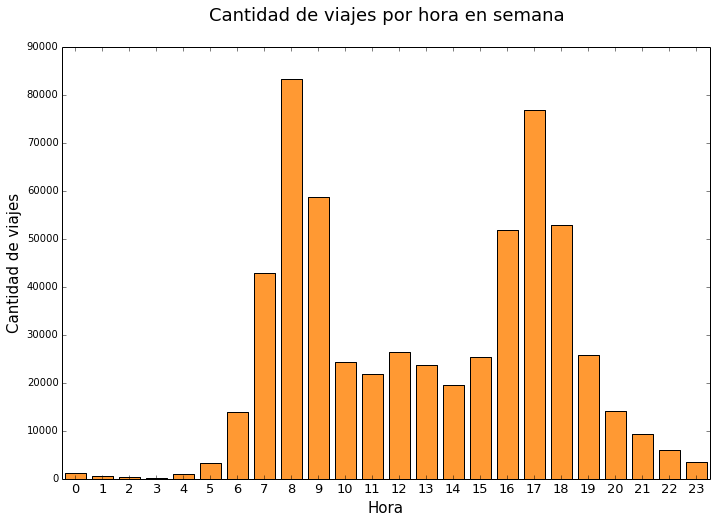

In [8]:
%matplotlib inline
from numpy import ma

X = np.arange(len(cantidad_bicis_por_hora.index))
Y = cantidad_bicis_por_hora.loc[:,'id']

plot.axes([0.025, 0.025, 1.5, 1.5])
#plot.bar(X + 0.25, Y3, width = 0.5, align="center")
plot.bar(X , Y, facecolor='#ff9933', align="center") #no subscriptos, azul #alpha es la opacidad


#for x, y in zip(X, Y1):
#    plot.text(x + 0.4, y + 0.05, '%.2f' % y, ha='right', va= 'bottom')

#for x, y in zip(X, Y2):
#    plot.text(x + 0.4, y + 0.05, '%.2f' % y, ha='right', va= 'top')

plot.xlim(-.5,23+.5)
plot.xticks(X,fontsize = 13)
plot.xlabel('Hora', fontsize = 15)

#plot.ylim(0, 5400) #solo para que quede lindo, igual deberia ser segun los valores blabla..
#plot.yticks(())
plot.ylabel('Cantidad de viajes', fontsize = 15)

plot.title('Cantidad de viajes por hora en semana\n', fontsize = 18)

plot.show()